In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()

,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
loan_applicant_id              41188 non-null int64
age                            41188 non-null int64
education                      41188 non-null object
years_with_current_employer    41188 non-null int64
years_at_current_address       41188 non-null int64
household_income               41188 non-null int64
debt_to_income_ratio           41188 non-null float64
credit_card_debt               41188 non-null float64
other_debt                     41188 non-null float64
y                              41188 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 3.1+ MB


### EDA

In [5]:
df.groupby('education')['y'].mean()

education
basic                  0.112558
high.school            0.112296
illiterate             0.116137
professional.course    0.109208
university.degree      0.113082
Name: y, dtype: float64

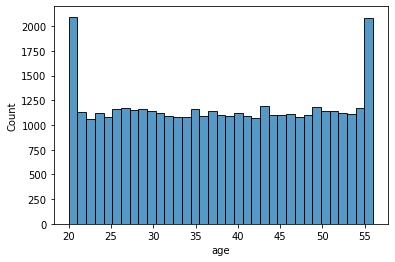

In [6]:
sns.histplot(data=df, x="age")

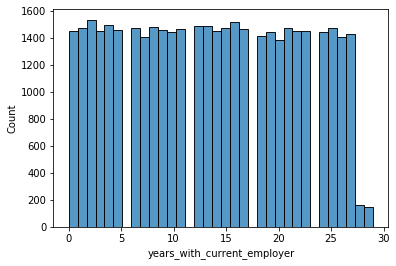

In [7]:
sns.histplot(data=df, x="years_with_current_employer")

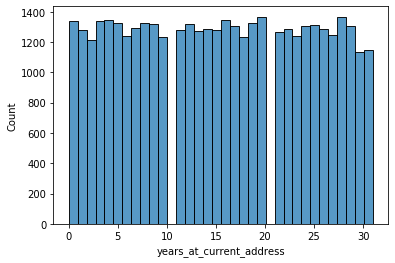

In [8]:
sns.histplot(data=df, x="years_at_current_address")

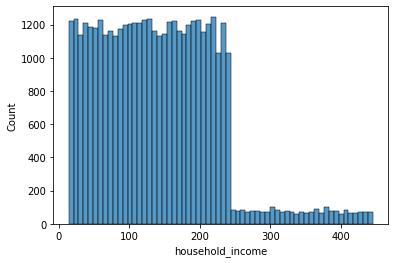

In [9]:
sns.histplot(data=df, x="household_income")

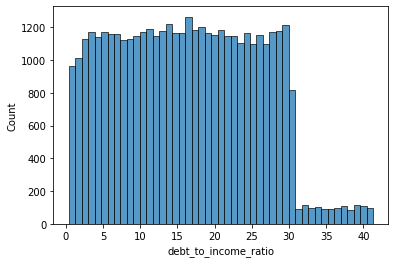

In [10]:
sns.histplot(data=df, x="debt_to_income_ratio")

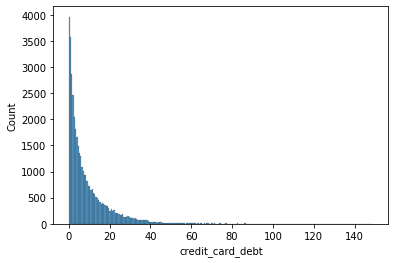

In [11]:
sns.histplot(data=df, x="credit_card_debt")

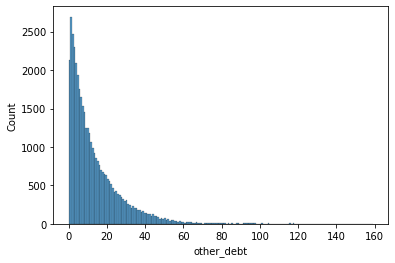

In [12]:
sns.histplot(data=df, x="other_debt")

### Missing Values Analysis

In [13]:
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns.")

Data has 41188 rows and 10 columns.


In [14]:
df.describe()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,38.007842,13.549869,15.385331,139.707366,16.224054,9.577260,13.758168,0.112654
std,11890.09578,10.623627,8.145105,9.184471,81.688037,9.191426,12.408628,14.596510,0.316173
min,1.00000,20.000000,0.000000,0.000000,14.000000,0.400386,0.005668,0.021759,0.000000
25%,10297.75000,29.000000,6.000000,7.000000,74.000000,8.452497,1.853292,3.783906,0.000000
50%,20594.50000,38.000000,14.000000,15.000000,134.000000,16.105334,5.311447,9.153871,0.000000
75%,30891.25000,47.000000,21.000000,23.000000,196.000000,23.730786,12.636789,18.906855,0.000000
max,41188.00000,56.000000,29.000000,31.000000,446.000000,41.293984,149.015859,159.198221,1.000000


In [15]:
df.isna().sum()

loan_applicant_id              0
age                            0
education                      0
years_with_current_employer    0
years_at_current_address       0
household_income               0
debt_to_income_ratio           0
credit_card_debt               0
other_debt                     0
y                              0
dtype: int64

## Feature Engineering, Scaling and Modelling

In [16]:
# Dropping loan_applicant_id
df.drop("loan_applicant_id", axis=1, inplace=True)

### Logistic Regression using standardization for numerical features

#### Split data into train and test-samples

In [17]:
y = df["y"]
X = df.drop("y", axis=1)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder())
    ])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

model = Pipeline(steps = [('preprocessor', preprocessor),
                    ('classifier',LogisticRegression())
                  ])

model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]

The ROC-score is 0.8096555594582366.


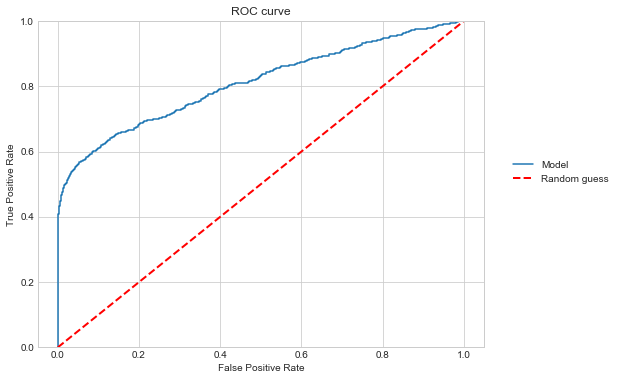

In [19]:
score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

print(f"The ROC-score is {score}.")

plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.ylim([0,1])
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(bbox_to_anchor = (1.3, 0.6))
plt.show()

### Logistic Regression using Box-Cox Transformation

##### Start with showing how Box-Cox Transformation visually using plots of before and after transformation
This is just a visual example so I will use the whole dataset, thus not splitting into train and test-samples as one would do if used for modelling purposes. This is done later.

In [20]:
X = df.drop(["y"], axis=1)
X = pd.get_dummies(X)
X_tmp = X.select_dtypes(["int64", "float64"])

In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_tmp = pd.DataFrame(pt.fit_transform(X_tmp), columns=X.select_dtypes(["int64", "float64"]).columns)

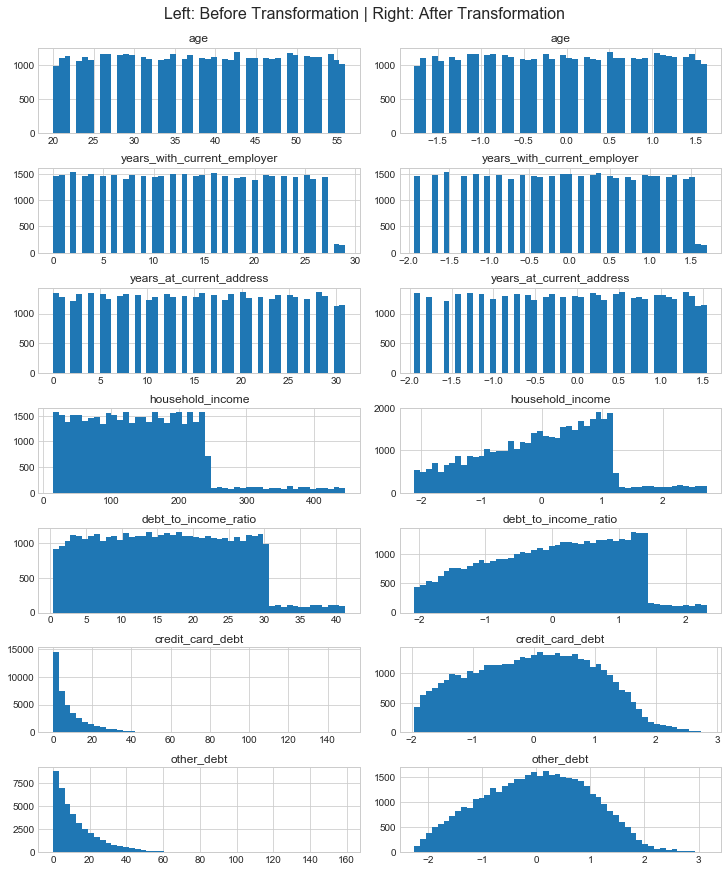

In [22]:
fig, ax = plt.subplots(7, 2, figsize=(10, 12), constrained_layout = True)
fig.suptitle('Left: Before Transformation | Right: After Transformation', fontsize=16)

ax[0,0].hist(X.age, bins=50);
ax[0,1].hist(X_tmp.age, bins=50);
ax[1,0].hist(X.years_with_current_employer, bins=50);
ax[1,1].hist(X_tmp.years_with_current_employer, bins=50);
ax[2,0].hist(X.years_at_current_address, bins=50);
ax[2,1].hist(X_tmp.years_at_current_address, bins=50);
ax[3,0].hist(X.household_income, bins=50);
ax[3,1].hist(X_tmp.household_income, bins=50);
ax[4,0].hist(X.debt_to_income_ratio, bins=50);
ax[4,1].hist(X_tmp.debt_to_income_ratio, bins=50);
ax[5,0].hist(X.credit_card_debt, bins=50);
ax[5,1].hist(X_tmp.credit_card_debt, bins=50);
ax[6,0].hist(X.other_debt, bins=50);
ax[6,1].hist(X_tmp.other_debt, bins=50);

ax[0,0].title.set_text("age")
ax[0,1].title.set_text("age")
ax[1,0].title.set_text("years_with_current_employer")
ax[1,1].title.set_text("years_with_current_employer")
ax[2,0].title.set_text("years_at_current_address")
ax[2,1].title.set_text("years_at_current_address")
ax[3,0].title.set_text("household_income")
ax[3,1].title.set_text("household_income")
ax[4,0].title.set_text("debt_to_income_ratio")
ax[4,1].title.set_text("debt_to_income_ratio")
ax[5,0].title.set_text("credit_card_debt")
ax[5,1].title.set_text("credit_card_debt")
ax[6,0].title.set_text("other_debt")
ax[6,1].title.set_text("other_debt")

# fig.tight_layout()

##### Implementing Box-Cox Transformation into modelling pipeline

In [23]:
y = df["y"]
X = df.drop("y", axis=1)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', PowerTransformer(method='yeo-johnson'))
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder())
    ])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

model_power = Pipeline(steps = [('preprocessor', preprocessor),
                    ('classifier',LogisticRegression())
                  ])

model_power.fit(X_train, y_train)
y_pred_power = model.predict_proba(X_test)[:,1]

In [25]:
score_power = roc_auc_score(y_test, y_pred_power)
fpr_power, tpr_power, thresholds_power = roc_curve(y_test, y_pred_power)

print(f"The ROC-score with power transformation is {score_power}.")

The ROC-score with power transformation is 0.8096555594582366.


### Logistic Regression using normalization for numerical features

In [26]:
y = df["y"]
X = df.drop("y", axis=1)

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', Normalizer(norm='l1'))
    ])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',  OneHotEncoder())
    ])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

model_N = Pipeline(steps = [('preprocessor', preprocessor),
                    ('classifier',LogisticRegression(max_iter=1000))
                  ])

model_N.fit(X_train, y_train)
y_pred_N = model.predict_proba(X_test)[:,1]

In [28]:
score_N = roc_auc_score(y_test, y_pred_N)
fpr_N, tpr_N, thresholds_N = roc_curve(y_test, y_pred_N)

print(f"The ROC-score is {score_N}.")


The ROC-score is 0.8096555594582366.
